In [2]:
import pandas as pd # pip install pandas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn

dengue = pd.read_csv('Casos_de_Dengue_Caqueta.csv')
# Visualización de los datos
print(dengue.head())



   ID  NombreEstacion  FECHA REPORTE MES REPORTE  SEMANA EPIDEMIOLOGICA  EDAD  \
0   1             210           2018       ENERO                      1    34   
1   2             210           2018       ENERO                      1    28   
2   3             210           2018       ENERO                      2    20   
3   4             210           2018       ENERO                      2     1   
4   5             210           2018       ENERO                      2     8   

  UNI_MED NACIONALIDAD       SEXO REGIMEN DE SALUD       PERTENECIA ETNICA  \
0    AÑOS     COLOMBIA   FEMENINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   
1    AÑOS     COLOMBIA  MASCULINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   
2    AÑOS     COLOMBIA   FEMENINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   
3    AÑOS     COLOMBIA   FEMENINO     CONTRIBUTIVO  SIN PERTENENCIA ETNICA   
4    AÑOS     COLOMBIA   FEMENINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   

                            NOM UPGD NOMBRE 

In [3]:
# Imprimir el encabezado del apartado de lluvias.
lluvia = pd.read_csv('Precipitacion.csv',sep=None, engine='python', encoding='latin-1', on_bad_lines='skip')
print(lluvia.head())

   CodigoEstacion         NombreEstacion       Variable  \
0        44135010  ARARACUARA [44135010]  PRECIPITACION   
1        44135010  ARARACUARA [44135010]  PRECIPITACION   
2        44135010  ARARACUARA [44135010]  PRECIPITACION   
3        44135010  ARARACUARA [44135010]  PRECIPITACION   
4        44135010  ARARACUARA [44135010]  PRECIPITACION   

                     Parametro           Fecha Unidad  Valor NivelAprobacion  
0  Precipitacion total mensual  1/01/2018 0:00     mm  241.3      Definitivo  
1  Precipitacion total mensual  1/02/2018 0:00     mm   62.1      Definitivo  
2  Precipitacion total mensual  1/03/2018 0:00     mm  356.6      Definitivo  
3  Precipitacion total mensual  1/04/2018 0:00     mm  394.4      Definitivo  
4  Precipitacion total mensual  1/05/2018 0:00     mm  483.8      Definitivo  


In [4]:
# Imprimir los datos nulos del sistema.
print(dengue.isnull().sum())
print(lluvia.isnull().sum())

ID                          0
NombreEstacion              0
FECHA REPORTE               0
MES REPORTE                 0
SEMANA EPIDEMIOLOGICA       0
EDAD                        0
UNI_MED                     0
NACIONALIDAD                0
SEXO                        0
REGIMEN DE SALUD            0
PERTENECIA ETNICA           0
NOM UPGD                    0
NOMBRE DEL EVENTO           0
PAIS REPORTE                0
DEPARTAMENTO REPORTE        0
MUNICIPIO REPORTE           0
Unnamed: 16              6807
dtype: int64
CodigoEstacion     0
NombreEstacion     0
Variable           0
Parametro          0
Fecha              0
Unidad             0
Valor              0
NivelAprobacion    0
dtype: int64


In [5]:
# Con el análisis anterior deteminamos que la celda "Unnamed: 16",
# esta formada casi integramente de datos nulos por lo que la borramos
dengue.drop('Unnamed: 16',axis=1,inplace=True)
print(dengue.head())

   ID  NombreEstacion  FECHA REPORTE MES REPORTE  SEMANA EPIDEMIOLOGICA  EDAD  \
0   1             210           2018       ENERO                      1    34   
1   2             210           2018       ENERO                      1    28   
2   3             210           2018       ENERO                      2    20   
3   4             210           2018       ENERO                      2     1   
4   5             210           2018       ENERO                      2     8   

  UNI_MED NACIONALIDAD       SEXO REGIMEN DE SALUD       PERTENECIA ETNICA  \
0    AÑOS     COLOMBIA   FEMENINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   
1    AÑOS     COLOMBIA  MASCULINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   
2    AÑOS     COLOMBIA   FEMENINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   
3    AÑOS     COLOMBIA   FEMENINO     CONTRIBUTIVO  SIN PERTENENCIA ETNICA   
4    AÑOS     COLOMBIA   FEMENINO       SUBSIDIADO  SIN PERTENENCIA ETNICA   

                            NOM UPGD NOMBRE 

In [12]:
# Identificar edades inconsistentes
# consi# deremos que las edades válidas están entre 18 y 90
edades_inconsistentes=dengue[(dengue['EDAD']<1) | (dengue['EDAD']>100)|(dengue['EDAD'].isnull())]
print(edades_inconsistentes)

Empty DataFrame
Columns: [ID, NombreEstacion, FECHA REPORTE, MES REPORTE, SEMANA EPIDEMIOLOGICA, EDAD, UNI_MED, NACIONALIDAD, SEXO, REGIMEN DE SALUD, PERTENECIA ETNICA, NOM UPGD, NOMBRE DEL EVENTO, PAIS REPORTE, DEPARTAMENTO REPORTE, MUNICIPIO REPORTE]
Index: []


In [7]:
# Identificar inconsistencias en los nombres de ciudades
# ver una lista única de las ciudades ingresadas para detectar variaciones
municipios_unicos=dengue['MUNICIPIO REPORTE'].dropna().unique()
print("\n municipios con casos de Dengue")
print(municipios_unicos)
municipios_monitoreados = lluvia['NombreEstacion'].dropna().unique()
print("\n municipios monitoriados")
print(municipios_monitoreados)


 municipios con casos de Dengue
['FLORENCIA' 'SAN VICENTE DEL CAGUAN' 'CAQUETA. MUNICIPIO DESCONOCIDO'
 'CARTAGENA DELCHAIRA' 'EL PAUJIL' 'SOLANO' 'CURILLO' 'PUERTO RICO'
 'SAN JOSE DEL FRAGUA' 'MORELIA' 'SOLITA' 'BELEN DE LOS ANDAQUIES'
 'LA MONTANITA' 'EL DONCELLO' 'ALBANIA' 'VALPARAISO' 'MILAN']

 municipios monitoriados
['ARARACUARA [44135010]' 'BELEN DE ANDAQUIES [44040020]'
 'CARTAGENA D CHAIRA [46040010]' 'CORDOBA [44100010]' 'CUEMANI [44140020]'
 'ESTRECHOS LOS [44127010]' 'LARANDIA [44030060]' 'MACAGUAL [44035030]'
 'MAGUARE - AUT [46035010]' 'MARACAIBO [4403000112]']


In [11]:
# Encontramos ahora que existen datos que no tienen definido el dato de
# que es un dato fundamental para la data por lo que tambien eliminamos las filas
# que tienen un dado de 'CAQUETA. MUNICIPIO DESCONOCIDO'ArithmeticError
# Eliminamos las filas donde 'MUNICIPIO REPORTE' es 'CAQUETA. MUNICIPIO DESCONOCIDO'
dengue = dengue[dengue['MUNICIPIO REPORTE'] != 'CAQUETA. MUNICIPIO DESCONOCIDO']
municipios_unicos=dengue['MUNICIPIO REPORTE'].dropna().unique()
print("\n municipios con casos de Dengue")
print(municipios_unicos)


 municipios con casos de Dengue
['FLORENCIA' 'SAN VICENTE DEL CAGUAN' 'CARTAGENA DELCHAIRA' 'EL PAUJIL'
 'SOLANO' 'CURILLO' 'PUERTO RICO' 'SAN JOSE DEL FRAGUA' 'MORELIA' 'SOLITA'
 'BELEN DE LOS ANDAQUIES' 'LA MONTANITA' 'EL DONCELLO' 'ALBANIA'
 'VALPARAISO' 'MILAN']



 Distribución de los casos por Municipio
MUNICIPIO REPORTE
FLORENCIA                 2718
SAN VICENTE DEL CAGUAN    1616
PUERTO RICO                423
SOLANO                     318
CARTAGENA DELCHAIRA        316
SAN JOSE DEL FRAGUA        211
EL DONCELLO                208
CURILLO                    205
EL PAUJIL                  200
ALBANIA                    143
BELEN DE LOS ANDAQUIES     136
LA MONTANITA               101
SOLITA                      76
MILAN                       71
VALPARAISO                  46
MORELIA                     17
Name: count, dtype: int64
MUNICIPIO REPORTE
FLORENCIA                 0.399412
SAN VICENTE DEL CAGUAN    0.237472
PUERTO RICO               0.062160
SOLANO                    0.046730
CARTAGENA DELCHAIRA       0.046436
SAN JOSE DEL FRAGUA       0.031007
EL DONCELLO               0.030566
CURILLO                   0.030125
EL PAUJIL                 0.029390
ALBANIA                   0.021014
BELEN DE LOS ANDAQUIES    0.019985
LA MONTANITA   

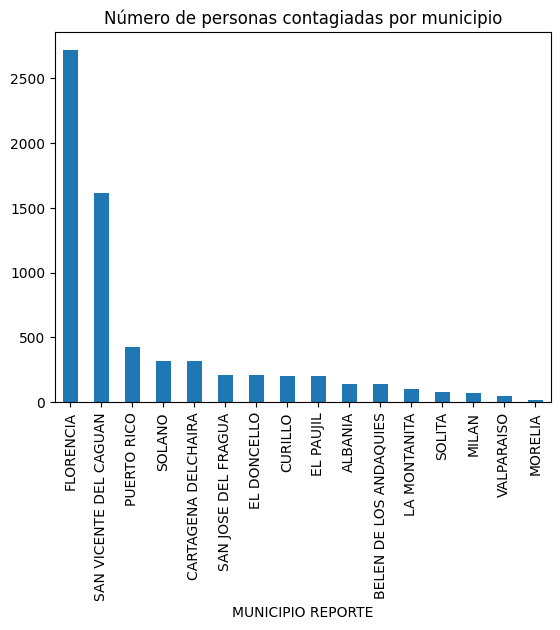


 Distribución de los casos por Año
FECHA REPORTE
2023    1948
2020    1931
2019    1246
2022    1104
2021     387
2018     189
Name: count, dtype: int64
FECHA REPORTE
2023    0.286260
2020    0.283762
2019    0.183101
2022    0.162234
2021    0.056870
2018    0.027774
Name: proportion, dtype: float64


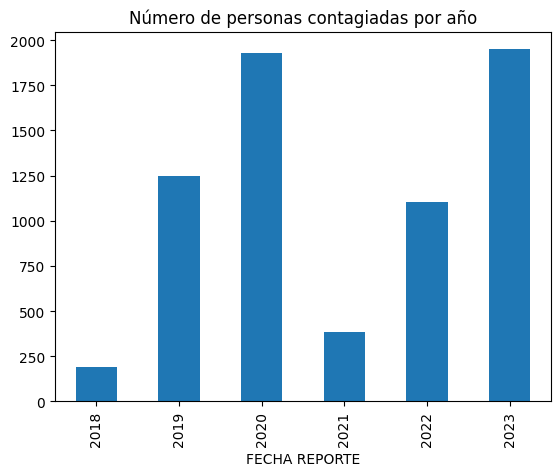


 Distribución de los casos por Mes
MES REPORTE
FEBRERO       849
MARZO         840
ENERO         835
ABRIL         750
MAYO          652
DICIEMBRE     546
JULIO         505
JUNIO         449
OCTUBRE       423
NOVIEMBRE     390
AGOSTO        311
SEPTIEMBRE    255
Name: count, dtype: int64
MES REPORTE
FEBRERO       0.124761
MARZO         0.123439
ENERO         0.122704
ABRIL         0.110213
MAYO          0.095812
DICIEMBRE     0.080235
JULIO         0.074210
JUNIO         0.065981
OCTUBRE       0.062160
NOVIEMBRE     0.057311
AGOSTO        0.045702
SEPTIEMBRE    0.037472
Name: proportion, dtype: float64


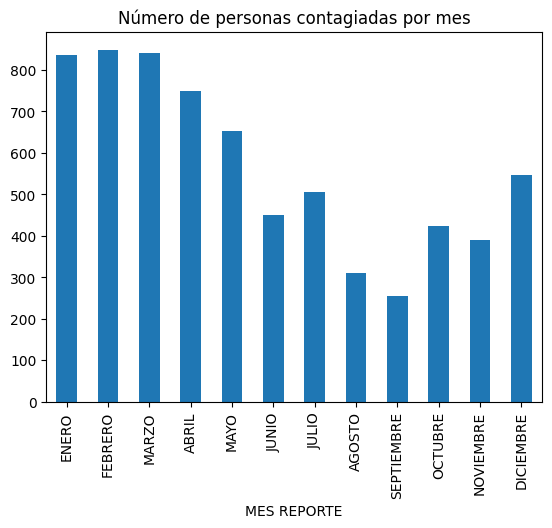

In [20]:
# Revisar la distribución de la muestra
print ("\n Distribución de los casos por Municipio")
print (dengue['MUNICIPIO REPORTE'].value_counts())
print (dengue['MUNICIPIO REPORTE'].value_counts(normalize=True))
dengue['MUNICIPIO REPORTE'].value_counts().plot(kind='bar',title='Número de personas contagiadas por municipio')
plt.show()
print ("\n Distribución de los casos por Año")
print (dengue['FECHA REPORTE'].value_counts())
print (dengue['FECHA REPORTE'].value_counts(normalize=True))
# Obtener los años únicos y ordenarlos de menor a mayor
anios_ordenados = sorted(dengue['FECHA REPORTE'].unique())
# Graficar los casos por año en orden
dengue['FECHA REPORTE'].value_counts().reindex(anios_ordenados).plot(kind='bar', title='Número de personas contagiadas por año')
plt.show()
print ("\n Distribución de los casos por Mes")
print (dengue['MES REPORTE'].value_counts())
print (dengue['MES REPORTE'].value_counts(normalize=True))
# Ordenar los meses del año en español
meses_ordenados = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
dengue['MES REPORTE'].value_counts().reindex(meses_ordenados).plot(kind='bar', title='Número de personas contagiadas por mes')
plt.show()

Distribución de la muestra por rango de edad: 
EDAD
1-17      4321
18-29     1185
30-44      723
45-59      351
60-100     225
Name: count, dtype: int64


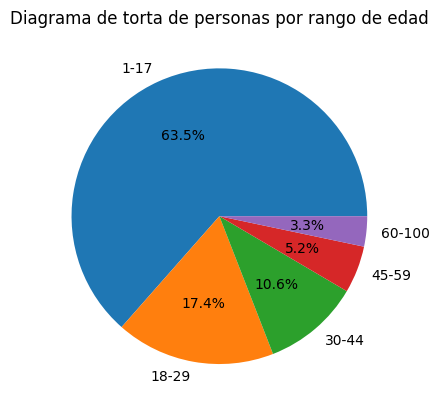

In [ ]:
# Diagrama de distribución de edad de los contagiados con dengue
print ("Distribución de la muestra por rango de edad: ")
# Definir los rangos y etiquetas de edad
bins = [1, 18, 30, 45, 60, 100]
labels = ['1-17', '18-29', '30-44', '45-59', '60-100']

# Agrupar las edades en rangos
edades_rango = pd.cut(dengue['EDAD'], bins=bins, labels=labels, right=False)

# Mostrar el conteo de personas en cada grupo de edad
print(edades_rango.value_counts())

# Graficar la distribución por rango de edad
plt.figure()
edades_rango.value_counts().plot(kind="pie", labels=labels, title='Diagrama de torta de personas por rango de edad', autopct='%1.1f%%')
plt.ylabel('')
plt.show()